In [1]:
using CSV, DataFrames, wgregseq, CairoMakie, Statistics

In [22]:
wgregseq.plotting_style.default_makie!()

## Mapping

In [57]:
df_map = CSV.read(
    "../../../data/barcodes/20230129_mapping/mapping_identified.csv",
    DataFrame,
    header=["promoter", "barcode", "count", "name", "nmut"]
)
sort!(df_map, :count, rev=true)
df_map = df_map[df_map.count .> 1, :]
first(df_map, 5)

Row,promoter,barcode,count,name,nmut
,String,String31,Int64,String,Int64
1,TCCACATTGACTGTTTGCACGGCATCACATTTTGCTATGCCATAGCATTTTTATCCATAAGAGTAGCGGATCCTACCTGACGCTTTTTATCGCATCTCTCTACTGTTTCTCCATACCCGGTCATTAGGATGGAGTGAAATGATGGGGATCGCAAGTCGAG,TTGCGATCCCCATCATTTCA,1966,araBp,20
2,GCCAGATTGATTAGTTGCACGGCGTCACACCTTGCTATGCCATCGCATTTTTATCCATAAGATTAGAGGATACTACCTGCCGCTTTTTATCACAACTCTCACCTATCTCTCTATACCCGTTTTTTTGGATGGAGTGAAACGATGTCGAGCATCGGGTGGG,ATCGTTTCACTCCATCCAAA,1588,*,0
3,AATTGCGCAACAAAAGTAAGATCACGGTAACAAATCAAGAACTAAACCAAAAATCGTAATCGTAACATACAAATCTGCAATTGTTTTCCCCTGTTCCGTTGCGAAAAATTTGTTACGATTATCGCGGTGATTGTCACTTATTAAAACTGTCGAGCATCGG,AGTTTTAATAAGTGACAATC,1147,xylFp,16
4,TCAGGTGTGATGCTCGGGGATCCGAATTCGAGCTCCGTCGACAAGCTTGCGGCCGCACTCGAGTAACTAGTTAACCCCTTGGGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGGAGGAACTATATGCGCTCATACGATATGAACGTTGAGACT,AGCGTCACCTTCCAGCGTTG,628,*,0
5,ATTTGCGCAACAAAAGTACGATCTAAGTCACAACTCATGAAATAAACCAAAAATCGTCATCGAAAGATAAAAATCTGCGATTGTTTTCCCCTGTTTAGTTACAAAAAATTGGTTACGTCTATCGCGGTGATTGTTAGTTATTAAAACTGTCGAGCATCGG,AGTTTTAATAACTAACAATC,620,xylFp,16


Filter out non-unique barcodes.

In [ ]:
un_list = []
for i in 1:nrow(df)
    push!(un_list, df_map.barcode[i] in df_map[1:end .!= i, :barcode])
end

Number of mutations

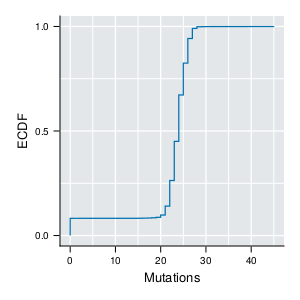

In [47]:
fig = Figure(resolution=(300, 300))
ax = Axis(fig[1, 1], xlabel="Mutations", ylabel="ECDF")
lines!(ax, sort(df_map.nmut), 1/nrow(df_map):1/nrow(df_map):1)
fig

Total counts per promoter.

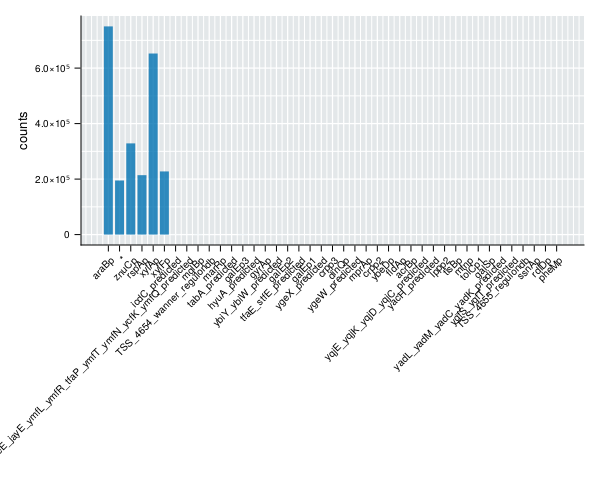

In [35]:
df = combine(groupby(df_map, :name), nrow)
fig = Figure(resolution=(600, 500))
ax = Axis(fig[1, 1], ylabel="counts", xticks=(collect(1:nrow(df)), df.name), xticklabelrotation=π/4, xticklabelsize=10)

barplot!(ax, df.nrow)

fig

Filter out sequences with single reads.

In [49]:
df = df_map[(df_map.count .> 2) .& (df_map.nmut .< 30), :]

num_unique(x) = length(unique(x))

combine(groupby(df, :name), :promoter => num_unique)

Row,name,promoter_num_unique
,String,Int64
1,*,10312
2,znuCp,2383
3,rspAp,2261
4,araBp,5181
5,xylAp,4472
6,xylFp,2297
7,icdC_predicted,10
8,ymfM_beeE_jayE_ymfL_ymfR_tfaP_ymfT_ymfN_ycfK_ymfQ_predicted,6
9,mglBp,15


## DNA reads

In [ ]:
df_DG = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/DG_collapsed.txt", 
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["count", "barcode"]
);

In [7]:
df_DP = CSV.read(
    "../../../data/extracted_barcodes/20230209_barcode/DP_collapsed.txt",
    DataFrame, 
    ignorerepeated=true,
    delim=" ",
    header=["count", "barcode"]
);